In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [2]:
def compare_image(image1, image2, title1, title2, g):
    plt.figure(figsize=(9,9))
    plt.subplot(1,2,1)
    if g==1:
        plt.imshow(image1, cmap='gray')
    else:
        plt.imshow(image1)
    plt.title(title1)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(image2, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    
    plt.tight_layout()

# To gray
Getting the sunflower image and converting it to grayscale

(1401, 934)


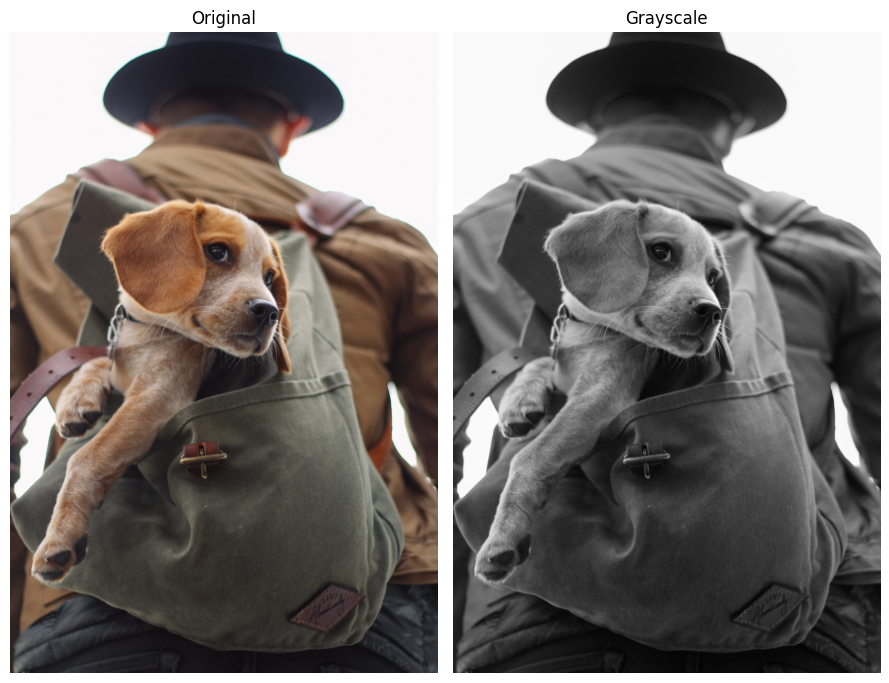

In [3]:
#cv2 reads in BGR format
inputimg = cv2.imread("dog_backpack.jpg")
img = cv2.cvtColor(inputimg, cv2.COLOR_BGR2GRAY)
cv2.imwrite('dog_backpack_gray.jpg', outputimg)
rgbimage = cv2.cvtColor(inputimg, cv2.COLOR_BGR2RGB)
print(img.shape)
compare_image(rgbimage, img, "Original", "Grayscale", 0)



# Filtering

In [4]:
#linear filter:
# 1/value * [ 1 1 1
#             1 1 1
#             1 1 1 ]


def filter(value):
    kernel = np.ones((3,3),np.float32)/value
    cnv = cv2.filter2D(img, -1, kernel)
    compare_image(img,cnv, "Original", "Filter", 1)
    
interactive(filter, value=(0,50))





interactive(children=(IntSlider(value=25, description='value', max=50), Output()), _dom_classes=('widget-inter…

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


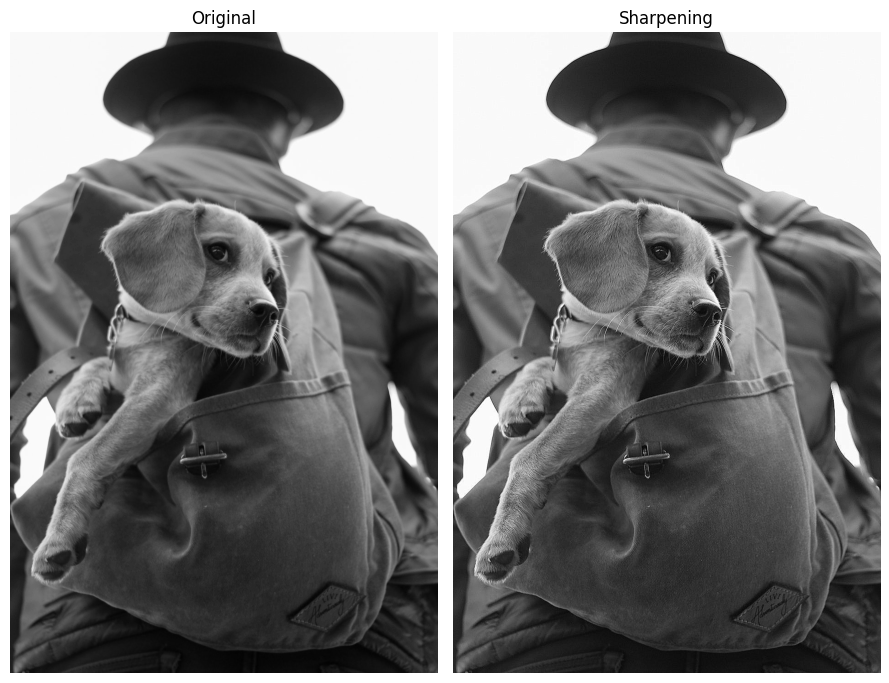

In [5]:
#sharpening

kernelsharp1 = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
print(kernelsharp1)

sharp = cv2.filter2D(img, -1, kernelsharp1)
compare_image(img, sharp, "Original", "Sharpening", 1)

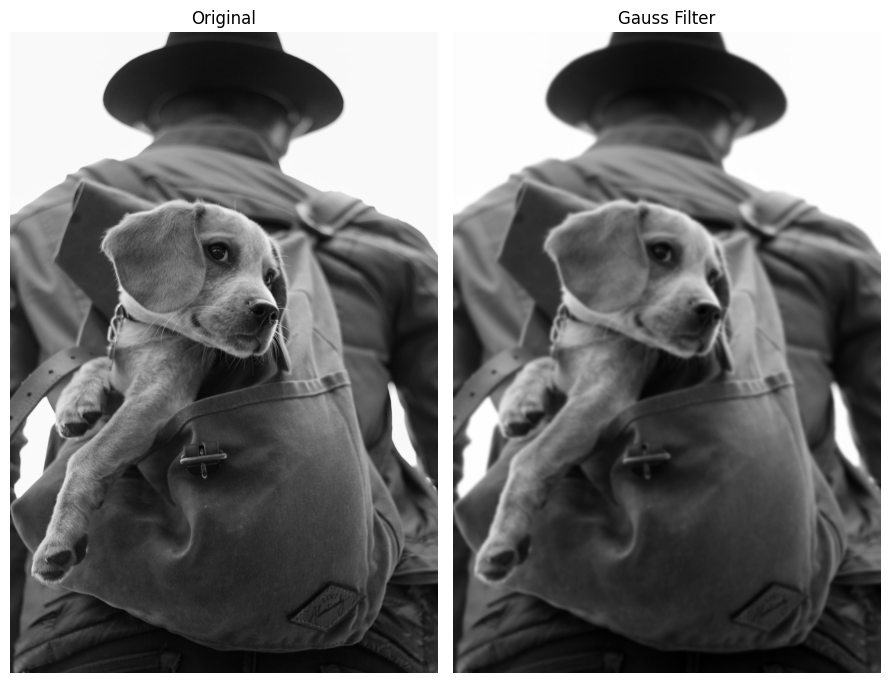

In [6]:
#gaussian filters

gauss = cv2.GaussianBlur(img,(15,15),0)
compare_image(img, gauss, "Original", "Gauss Filter", 1)



# Threshold

In [7]:
def n_thresholding(thres):
    th, newimg = cv2.threshold(img, thres, 255, cv2.THRESH_BINARY)
    compare_image(img, newimg, "Original", "Thresholding", 1)
interactive(n_thresholding, thres=(0,255))

interactive(children=(IntSlider(value=127, description='thres', max=255), Output()), _dom_classes=('widget-int…

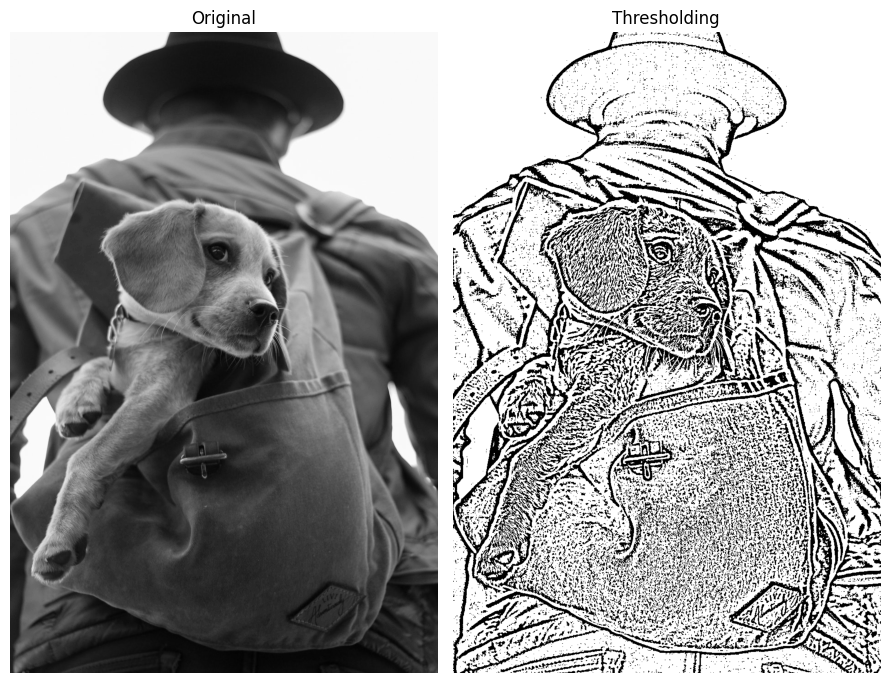

In [8]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
compare_image(img, th2, "Original", "Thresholding", 1)


# Edge Detector
Applies the Sobel Operator and generates as output an image with the detected edges.

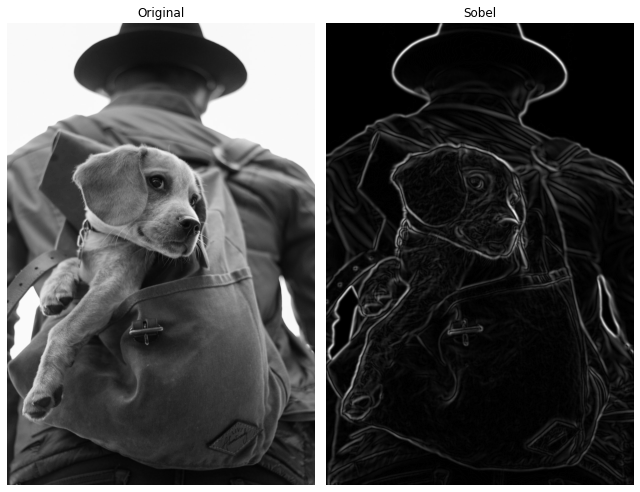

In [21]:
# Sobel
ddepth = cv2.CV_16S
scale = 1
delta = 0

grad_x = cv2.Sobel(gauss, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gauss, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

compare_image(img, grad, "Original", "Sobel", 1)